# Counting results

In [2]:
import pandas as pd
from matplotlib_venn import venn3
from matplotlib import pyplot as plt

## Table in appendix

In [4]:
journals = pd.read_csv("../data/processed/journals_deduplicated.csv")
journals.head()

,title,wikidataURL,ISSN-L,openAlexID,dissolvedYear,dissolved,source
0,Korean Journal of Plant Taxonomy,http://www.wikidata.org/entity/Q27714217,1225-8318,S4210202049,NaN,NaN,Wikidata taxonomic subject
1,Korean Journal of Plant Taxonomy,http://www.wikidata.org/entity/Q27714217,1225-8318,S4306495623,NaN,NaN,Wikidata taxonomic subject
2,Bulletin of Zoological Nomenclature,http://www.wikidata.org/entity/Q15759939,0007-5167,S2764437286,NaN,NaN,Wikidata taxonomic subject
3,Sherbornia,http://www.wikidata.org/entity/Q21386365,2373-7697,NaN,NaN,NaN,Wikidata taxonomic subject
4,European Journal of Taxonomy,http://www.wikidata.org/entity/Q21386186,2118-9773,S2764351231,NaN,NaN,Wikidata taxonomic subject


In [5]:
#table = pd.DataFrame({"name":["Taxonomic journals with title",
#                             "Journals with Wikidata ID",
#                             "Journals with ISSN-L",
#                             "Journals with IPNI Publication ID in Wikidata",
#                             "Journals with ZooBank Publication ID in Wikidata",
#                             "Journals with OpenAlex ID"
#                            # union of OpenAlex ID and IPNI etc
#                             ],
#                      "value":[0,0,0,0,0,0]})
#
#table["value"] = table["value"].astype(str)  # Convert the column to string type
#
#table.loc[0,"value"] = str(len([x for x in journals["title"] if x == x]))

#for i, column in enumerate(journals.columns[1:6]):
#    table.loc[i+1, "value"] = str(len([x for x in journals[column] if x == x]))

#table = table.set_index("name")
#table # ctrl + click to select cells to copy

## 1. Journals

Taxonomic journals:
- with title
- found on wikidata (each method)
- found on OpenAlex
- total
- still publishing in the last 10 years
- dissolved (confirmed)
- with ISSN-L
- with IPNI publication ID
- with ZooBank publication ID
- with OpenAlex ID

In [8]:
print("Number of journals: " + str(len(journals)))
print("Number of journals with known title: "+\
      str(len([x for x in journals["title"] if x == x])))

Number of journals: 2568
Number of journals with known title: 2568


In [9]:
for column in journals.columns[1:6]:
    print(f"Number of journals with {column}: {journals[column].notna().sum()}")

Number of journals with wikidataURL: 2514
Number of journals with ISSN-L: 1645
Number of journals with openAlexID: 1077
Number of journals with dissolvedYear: 748
Number of journals with dissolved: 745


In [10]:
print("Journals that were dissolved (confirmed): ")
journals["dissolved"].value_counts()

Journals that were dissolved (confirmed): 


dissolved
True     593
False    152
Name: count, dtype: int64

In [11]:
# Filter journals with no OpenAlexID and not dissolved
filtered_data = journals[journals["openAlexID"].isna() & journals["dissolvedYear"].isna()]

# Take a random sample of 100 rows (all columns)
sample = filtered_data.sample(n=100, random_state=42)  # Adjust 'n' for sample size

# Output the sample
print(sample)

# Optionally, save the sample to a file
sample.to_csv("sample_journals.csv", index=False)

# Count the total
total_count = filtered_data.shape[0]  # Number of rows in the filtered data

# Print the total count
print(f"Total journals with no OpenAlexID and not dissolved: {total_count}")


                                                  title  \
998   The Transactions and Journal of Proceedings of...   
789                                  Carnets botaniques   
780   Vorlesungen der Churpfälzischen physicalisch-ö...   
480                                           Q17628528   
730   Anales de la Academia Chilena de Ciencias Natu...   
...                                                 ...   
898                                  Medical Repository   
2280  Cactus; Revue Bimensuelle pour Amateurs de Cac...   
1604                                  Annals of Zoology   
715   Botanicheskie Materialy Gerbariya Glavnogo Bot...   
1414               Tasmanian Journal of Natural Science   

                                    wikidataURL     ISSN-L openAlexID  \
998    http://www.wikidata.org/entity/Q51391127  0141-1292        NaN   
789   http://www.wikidata.org/entity/Q114642885        NaN        NaN   
780   http://www.wikidata.org/entity/Q108632025        NaN        NaN   

In [12]:
articles = pd.read_pickle("../data/interim/filtered_articles.pkl")
articles.head()

,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,source_is_core,source_host_organization,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,oa_is_oa,oa_oa_status,oa_oa_url,oa_any_repository_has_fulltext
0,https://openalex.org/W2766208183,https://doi.org/10.1371/journal.pone.0185809,More than 75 percent decline over 27 years in ...,More than 75 percent decline over 27 years in ...,2017,2017-10-18,{'openalex': 'https://openalex.org/W2766208183...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,True,https://openalex.org/P4310315706,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True
1,https://openalex.org/W1577451703,https://doi.org/10.1371/journal.pone.0131080,Biodiversity on the Rocks: Macrofauna Inhabiti...,Biodiversity on the Rocks: Macrofauna Inhabiti...,2015,2015-07-09,{'openalex': 'https://openalex.org/W1577451703...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,True,https://openalex.org/P4310315706,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True
2,https://openalex.org/W2130560194,https://doi.org/10.1371/journal.pone.0105992,SoilGrids1km — Global Soil Information Based o...,SoilGrids1km — Global Soil Information Based o...,2014,2014-08-29,{'openalex': 'https://openalex.org/W2130560194...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,True,https://openalex.org/P4310315706,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True
3,https://openalex.org/W2155544089,https://doi.org/10.1371/journal.pone.0125814,Mapping Soil Properties of Africa at 250 m Res...,Mapping Soil Properties of Africa at 250 m Res...,2015,2015-06-25,{'openalex': 'https://openalex.org/W2155544089...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,True,https://openalex.org/P4310315706,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True
4,https://openalex.org/W2122522916,https://doi.org/10.1371/journal.pone.0144296,Sentiment of Emojis,Sentiment of Emojis,2015,2015-12-07,{'openalex': 'https://openalex.org/W2122522916...,en,"{'is_oa': True, 'landing_page_url': 'https://d...",article,...,True,https://openalex.org/P4310315706,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True


In [13]:
print("Number of journals that contained relevant (i.e. taxonomic) articles: " + \
      str(len(set(articles["source_id"]))))

Number of journals that contained relevant (i.e. taxonomic) articles: 457


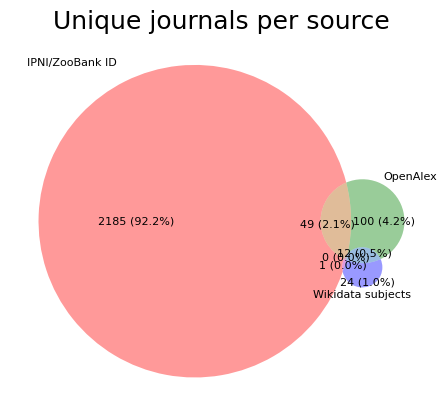

In [14]:
# Define sets
ipnizoo = set(journals[journals["source"] == "IPNI or ZooBank ID"]["title"])
openalex = set(journals[journals["source"] == "OpenAlex taxonomy concept"]["title"])
wikisubjects = set(journals[journals["source"] == "Wikidata taxonomic subject"]["title"])

# Total unique journals for percentage calculation
total_journals = len(ipnizoo | openalex | wikisubjects)

# Venn diagram
venn = venn3([ipnizoo, openalex, wikisubjects], ("IPNI/ZooBank ID", "OpenAlex", "Wikidata subjects"))

# Adjust subset label font sizes (numbers inside the diagram)
for label in venn.subset_labels:
    if label:  # Only adjust non-empty labels
        label.set_fontsize(8)  # Set font size (adjust value as needed)

# Adjust set label font sizes (labels for the circles)
for label in venn.set_labels:
    if label:  # Only adjust non-empty labels
        label.set_fontsize(8)  # Set font size (adjust value as needed)
# Annotate each section with count and percentage

for idx, label in enumerate(venn.subset_labels):
    if label:  # Only annotate non-empty regions
        count = int(label.get_text())  # Convert count to integer
        percentage = (count / total_journals) * 100
        label.set_text(f"{count} ({percentage:.1f}%)")

# Add title
plt.title("Unique journals per source", fontsize=18)

# Display plot
plt.show()

## 2. Articles

- total number
- number with at least one European author

In [97]:
print("Number of articles related to taxonomy with at least one European author: " +\
      str(len(set(articles["id"]))))

Number of articles related to taxonomy with at least one European author: 32699


## 3. Authors

In [100]:
authors = pd.read_csv("../data/processed/country_taxonomic_authors_no_duplicates.tsv", sep="\t",low_memory=False)

In [102]:
print("Number of European authors before disambiguation: "+\
      str(len(authors)))

Number of European authors before disambiguation: 32799


In [104]:
disamb_authors = pd.read_pickle("../data/processed/authors_disambiguated_truncated.pkl")

In [106]:
print("Number of European authors after disambiguation: "+\
      str(len(disamb_authors)))

Number of European authors after disambiguation: 32502


In [23]:
print("Number of European institutions publishing taxonomic articles: "+\
      str(len(set(disamb_authors["inst_id"]))))

Number of European institutions publishing taxonomic articles: 3092


In [24]:
len(set(authors[authors["inst_country_code"]=="BE"]["inst_display_name"]))

59

In [25]:
authors.columns

Index(['Index', 'article_id', 'author_position', 'author', 'institutions',
       'countries', 'is_corresponding', 'raw_author_name',
       'raw_affiliation_strings', 'affiliations', 'author_id',
       'author_display_name', 'author_orcid', 'inst_id', 'inst_display_name',
       'inst_ror', 'inst_country_code', 'inst_type', 'inst_lineage',
       'countries_list', 'id', 'doi', 'title', 'display_name',
       'publication_year', 'publication_date', 'ids', 'language',
       'primary_location', 'type', 'type_crossref', 'indexed_in',
       'open_access', 'authorships', 'institution_assertions',
       'countries_distinct_count', 'institutions_distinct_count',
       'corresponding_author_ids', 'corresponding_institution_ids', 'apc_list',
       'apc_paid', 'fwci', 'has_fulltext', 'fulltext_origin', 'cited_by_count',
       'citation_normalized_percentile', 'cited_by_percentile_year', 'biblio',
       'is_retracted', 'is_paratext', 'primary_topic', 'topics', 'keywords',
       'concepts

## 4. Taxonomy (not working)

Total number of families within Plantae:
Total number of families within Animalia:
Total number of families within Fungi:
Total number of families within Protists:
…. See similar figure here: https://data-blog.gbif.org/post/gbif-backbone-taxonomy/

In [156]:
# supply and demand order save?
authors_tree = pd.read_pickle("../data/processed/authors_disambiguated_truncated.pkl")

In [158]:
authors2 = pd.read_pickle("../data/interim/country_taxonomic_authors_no_duplicates.pkl")

In [159]:
authors2.head()

,Index,article_id,author_position,author,institutions,countries,is_corresponding,raw_author_name,raw_affiliation_strings,affiliations,...,source_host_organization_name,source_host_organization_lineage,source_host_organization_lineage_names,source_type,oa_is_oa,oa_oa_status,oa_oa_url,oa_any_repository_has_fulltext,abstract_full_text,species_subject
0,34819,https://openalex.org/W3204621746,middle,"{'id': 'https://openalex.org/A5011137012', 'di...","[{'id': 'https://openalex.org/I2800424308', 'd...",[FI],False,Heikki Kotiranta,"[Finnish Environment Institute, Latokartanonka...",[{'raw_affiliation_string': 'Finnish Environme...,...,Springer Science+Business Media,"[https://openalex.org/P4310319965, https://ope...","[Springer Nature, Springer Science+Business Me...",journal,True,hybrid,https://link.springer.com/content/pdf/10.1007/...,True,Abstract Taxonomy of Basidiodendron caesiocine...,"[Corticium niveocremeum, Porpomyces abiens, Ba..."
1,10101,https://openalex.org/W3110768712,first,"{'id': 'https://openalex.org/A5045822273', 'di...","[{'id': 'https://openalex.org/I205984670', 'di...",[CZ],True,Rostislav Linda,"[Department of Silviculture, Faculty of Forest...",[{'raw_affiliation_string': 'Department of Sil...,...,Public Library of Science,[https://openalex.org/P4310315706],[Public Library of Science],journal,True,gold,https://journals.plos.org/plosone/article/file...,True,Birches are generally known for their high gen...,[]
2,53888,https://openalex.org/W2996643846,middle,"{'id': 'https://openalex.org/A5113890450', 'di...","[{'id': 'https://openalex.org/I189268942', 'di...",[ES],False,Manjón Jl,[Departamento de Ciencias de la Vida (Área de ...,[{'raw_affiliation_string': 'Departamento de C...,...,National Herbarium of the Netherlands,[https://openalex.org/P4310318525],[National Herbarium of the Netherlands],journal,True,green,https://hal.univ-lille.fr/hal-03890102/document,True,Novel species of fungi described in this study...,"[Apenidiella antarctica, Cladosporium fildesen..."
3,131672,https://openalex.org/W3016398297,last,"{'id': 'https://openalex.org/A5048775979', 'di...","[{'id': 'https://openalex.org/I4210136625', 'd...",[CH],False,Volker Fingerle,"[Bavarian Health and Food Safety Authority, Na...",[{'raw_affiliation_string': 'Members of the ES...,...,Microbiology Society,[https://openalex.org/P4310320497],[Microbiology Society],journal,True,bronze,https://doi.org/10.1099/ijsem.0.004149,True,Rejection (nomen rejiciendum) of the name Borr...,[]
4,134844,https://openalex.org/W2762662100,middle,"{'id': 'https://openalex.org/A5027741017', 'di...","[{'id': 'https://openalex.org/I4210091512', 'd...",[IT],False,Pierangelo Orlando,"[Consiglio Nazionale delle Ricerche (C.N.R.), ...",[{'raw_affiliation_string': 'Consiglio Naziona...,...,Microbiology Society,[https://openalex.org/P4310320497],[Microbiology Society],journal,True,bronze,https://doi.org/10.1099/ijsem.0.002391,False,"A Gram-stain-positive, aerobic, endospore-form...",[]


In [164]:
authors_tree.head()

,author_id,author_display_name,author_orcid,inst_id,inst_display_name,species_subject,truncatedName,strippedName,order,kingdom
0,https://openalex.org/A5011137012,Heikki Kotiranta,None,https://openalex.org/I2800424308,Finnish Environment Institute,"[Corticium niveocremeum, Porpomyces abiens, Ba...",H Kotiranta,HeikkiKotiranta,"[Trechisporales, Polyporales, Auriculariales, ...",[Fungi]
1,https://openalex.org/A5045822273,Rostislav Linda,https://orcid.org/0000-0002-9602-7915,https://openalex.org/I205984670,Czech University of Life Sciences Prague,[],R Linda,RostislavLinda,[],[]
2,https://openalex.org/A5113890450,Manjón Jl,None,https://openalex.org/I189268942,Universidad de Alcalá,"[Apenidiella antarctica, Cladosporium fildesen...",M Jl,ManjónJl,"[Mycosphaerellales, Capnodiales, Geastrales, H...","[Fungi, Plantae]"
3,https://openalex.org/A5048775979,Volker Fingerle,https://orcid.org/0000-0002-3835-5646,https://openalex.org/I4210136625,European Society of Clinical Microbiology and ...,[],V Fingerle,VolkerFingerle,[],[]
4,https://openalex.org/A5027741017,Pierangelo Orlando,https://orcid.org/0000-0002-7821-8507,https://openalex.org/I4210091512,Institute of Applied Science and Intelligent S...,[],P Orlando,PierangeloOrlando,[],[]


In [166]:
# 3. Count how many authors study each kingdom:
num_plantae = sum("Plantae" in k for k in authors_tree["kingdom"])
num_animalia = sum("Animalia" in k for k in authors_tree["kingdom"])
num_fungi    = sum("Fungi" in k for k in authors_tree["kingdom"])

print(f"Number of authors studying Plantae:  {num_plantae}")
print(f"Number of authors studying Animalia: {num_animalia}")
print(f"Number of authors studying Fungi:    {num_fungi}")


Number of authors studying Plantae:  5566
Number of authors studying Animalia: 11526
Number of authors studying Fungi:    1752


In [152]:
"""
def get_number_families(kingdom_name):
    kingdom = []

    for author in authors_tree.itertuples():
        if kingdom_name in author.kingdoms_subjects:
            kingdom.append(author)
            
    kingdom_df = pd.DataFrame(kingdom)
    
    families = []
    
    for author in kingdom_df.itertuples():
        for family in author.families_subjects:
            families.append(family)
            
    return len(set(families))
"""

In [154]:
"""
print("Number of plant families in data: " + str(get_number_families("Plantae")))
print("Number of animal families in data: " + str(get_number_families("Animalia")))
print("Number of fungal families in data: " + str(get_number_families("Fungi")))
# no protists in data
"""

AttributeError: 'Pandas' object has no attribute 'kingdoms_subjects'

## 5. Most prolific authors

In [113]:
top_authors = authors["author_id"].value_counts()[0:10]

In [115]:
sum(list(authors["author_id"].value_counts()))/len(list(authors["author_id"].value_counts()))

1.0

In [117]:
for author_id in top_authors.index:
    print(authors[authors["author_id"]==author_id].iloc[0]["author_display_name"] + \
          " has written " + str(top_authors.loc[author_id]) + " articles")

Heikki Kotiranta has written 1 articles
İlker Büyük has written 1 articles
Sven Winter has written 1 articles
Eladio Liñán has written 1 articles
Cristina Coccia has written 1 articles
Britta Munkes has written 1 articles
Vitus Stachniss has written 1 articles
Luís Guasch has written 1 articles
Meryem Bozkurt has written 1 articles
Ainhoa Ulibarri-Ochoa has written 1 articles


(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 32799.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

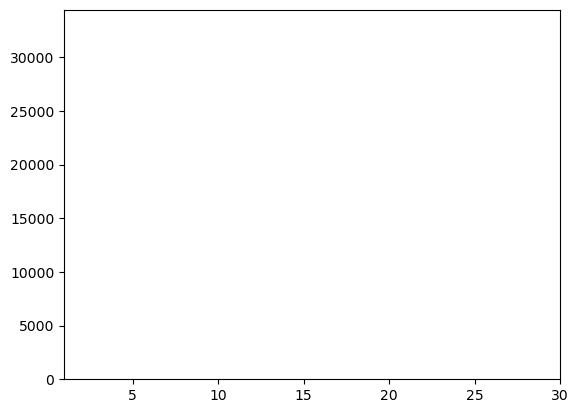

In [119]:
plt.xlim(1,30)
plt.hist(authors["author_id"].value_counts(), bins=150)

## 6. ORCID and Open Access percentages (not working)

In [121]:
# total percentage of authors with ORCID
disamb_authors["author_orcid"]

0                                         None
1        https://orcid.org/0000-0002-9602-7915
2                                         None
3        https://orcid.org/0000-0002-3835-5646
4        https://orcid.org/0000-0002-7821-8507
                         ...                  
32497    https://orcid.org/0000-0002-5328-3898
32498                                       {}
32499                                       {}
32500                                       {}
32501    https://orcid.org/0000-0002-8691-772X
Name: author_orcid, Length: 32502, dtype: object

In [122]:
orcid = 0
no_orcid = 0

for x in disamb_authors["author_orcid"]:
    if isinstance(x, str):
        if x.split(".org/")[0] == "https://orcid":
            orcid += 1
        #""" # checking if there are ORCIDs in lists didn't change the results
        #elif isinstance(x, tuple) or isinstance(x, set) or isinstance(x, list):
        #    if isinstance(x[0], str):
        #        if x[0].split(".org/")[0] == "https://orcid":
        #            orcid += 1
        #        else:
        #            no_oricd += 1
        #    else:
        #        no_orcid += 1
        #"""
        else:
            no_orcid += 1
    else:
        no_orcid += 1
        
print("Percentage of authors with an ORCID: " + str(orcid/(no_orcid+orcid)*100))

Percentage of authors with an ORCID: 74.87231554981231


In [123]:
articles = pd.read_pickle("../data/processed/taxonomic_articles_with_subjects.pkl")

In [124]:
vc = articles["oa_is_oa"].value_counts()

# Safely accessing by position using iloc
open_access_count = vc.iloc[0]
non_open_access_count = vc.iloc[1]

# Calculate the percentage
percentage_oa = (open_access_count / (open_access_count + non_open_access_count)) * 100

# Print the result
print(f"Percentage of European articles that are Open Access: {percentage_oa}")


Percentage of European articles that are Open Access: 55.5092659100704


In [125]:
vc = articles["oa_is_oa"].value_counts()

# Safely access by position using .iloc
if len(vc) > 1:  # Ensure there are at least two unique values
    open_access_count = vc.iloc[0]
    non_open_access_count = vc.iloc[1]

    # Calculate the percentage
    percentage_oa = (open_access_count / (open_access_count + non_open_access_count)) * 100

    # Print the result
    print(f"Percentage of European articles that are Open Access: {percentage_oa}")
else:
    print("Not enough data to calculate Open Access percentage.")


Percentage of European articles that are Open Access: 55.5092659100704


In [126]:
articles.columns

Index(['id', 'doi', 'title', 'display_name', 'publication_year',
       'publication_date', 'ids', 'language', 'primary_location', 'type',
       'type_crossref', 'indexed_in', 'open_access', 'authorships',
       'institution_assertions', 'countries_distinct_count',
       'institutions_distinct_count', 'corresponding_author_ids',
       'corresponding_institution_ids', 'apc_list', 'apc_paid', 'fwci',
       'has_fulltext', 'fulltext_origin', 'cited_by_count',
       'citation_normalized_percentile', 'cited_by_percentile_year', 'biblio',
       'is_retracted', 'is_paratext', 'primary_topic', 'topics', 'keywords',
       'concepts', 'mesh', 'locations_count', 'locations', 'best_oa_location',
       'sustainable_development_goals', 'grants', 'datasets', 'versions',
       'referenced_works_count', 'referenced_works', 'related_works',
       'abstract_inverted_index', 'cited_by_api_url', 'counts_by_year',
       'updated_date', 'created_date', 'is_authors_truncated',
       'location_is_

In [127]:
def species_to_tree(df, backbone):
    # make dictionary of genus, family, order, class, phylum, kingdom for every species
    seen_species = {}

    for species in backbone.itertuples():
        if species.canonicalName not in seen_species:
            seen_species[species.canonicalName] = list(species)[2:]
    
    # associate the full tree with a certain author or article
    genera, families, orders, classes, phyla, kingdoms, lineages = [], [], [], [], [], [], []

    for row in df.itertuples():
        genus, family, order, tclass, phylum, kingdom, lineage = [], [], [], [], [], [], []
                            # python won't allow class as a variable name

        for species in row.species_subject:
            if species in seen_species:
                genus.append(seen_species[species][-1])
                family.append(seen_species[species][-2])
                order.append(seen_species[species][-3])
                tclass.append(seen_species[species][-4])
                phylum.append(seen_species[species][-5])
                kingdom.append(seen_species[species][-6])
                
                lineage.append(seen_species[species][-6:])

        genera.append(set(genus))
        families.append(set(family))
        orders.append(set(order))
        classes.append(set(tclass))
        phyla.append(set(phylum))
        kingdoms.append(set(kingdom))
        lineages.append(lineage)

    df["genera_subjects"] = genera
    df["families_subjects"] = families
    df["orders_subjects"] = orders
    df["classes_subjects"] = classes
    df["phyla_subjects"] = phyla
    df["kingdoms_subjects"] = kingdoms
    df["lineages_subjects"] = lineages
    
    return df

In [128]:
def preprocess_backbone(path="../data/external/backbone/Taxon.tsv", no_blanks=False):
    # GBIF taxonomic bakcbone
    try:
        backbone = pd.read_csv(
                path,
                sep="\t",
                on_bad_lines='skip',
                low_memory=False,  # Ensures the entire file is processed in memory
                dtype=str  # Treats all columns as strings to avoid mixed-type issues
        )
    except Exception as e:
        raise RuntimeError(f"Failed to load file: {e}")
        
    # Ensure the key columns have appropriate data types
    for col in ["canonicalName", "kingdom", "genus", "family", "order", "class", "phylum"]:
        if col in backbone.columns:
            backbone[col] = backbone[col].astype(str).str.strip()  # Ensure consistent types and no extra whitespace
          
    # only Eukarya
    backbone = backbone[(backbone["kingdom"]=="Animalia") | 
                        (backbone["kingdom"]=="Plantae") |
                        (backbone["kingdom"]=="Fungi")]
    # include non-accepted species (synonyms etc), but not blank canonical names 
    backbone = backbone[np.logical_not(backbone["canonicalName"].isnull())].reset_index(drop=True)
    
    if no_blanks:
        backbone = backbone[np.logical_not(backbone["genus"].isnull())].reset_index(drop=True)
        backbone = backbone[np.logical_not(backbone["family"].isnull())].reset_index(drop=True)
        backbone = backbone[np.logical_not(backbone["order"].isnull())].reset_index(drop=True)
        backbone = backbone[np.logical_not(backbone["class"].isnull())].reset_index(drop=True)
        backbone = backbone[np.logical_not(backbone["phylum"].isnull())].reset_index(drop=True)
        backbone = backbone[np.logical_not(backbone["kingdom"].isnull())].reset_index(drop=True)

    backbone = backbone.drop_duplicates(ignore_index=True)
    return backbone

In [129]:
import numpy as np

In [130]:
backbone = preprocess_backbone()

In [131]:
articles2 = species_to_tree(articles, backbone)

In [132]:
plants_open = 0
plants_closed = 0

animals_open = 0
animals_closed = 0

fungi_open = 0
fungi_closed = 0

for row in articles2.itertuples():
    if "Plantae" in row.kingdoms_subjects:
        if row.oa_is_oa:
            plants_open += 1
        else:
            plants_closed += 1
            
    if "Animalia" in row.kingdoms_subjects:
        if row.oa_is_oa:
            animals_open += 1
        else:
            animals_closed += 1
            
    if "Fungi" in row.kingdoms_subjects:
        if row.oa_is_oa:
            fungi_open += 1
        else:
            fungi_closed += 1

In [133]:
print("Percentage of articles about plants that are open access: " + \
      str(plants_open/(plants_open+plants_closed)*100))
print("Percentage of articles about animals that are open access: " + \
      str(animals_open/(animals_open+animals_closed)*100))
print("Percentage of articles about fungi that are open access: " + \
      str(fungi_open/(fungi_open+fungi_closed)*100))

Percentage of articles about plants that are open access: 53.39477148768103
Percentage of articles about animals that are open access: 49.60268280236203
Percentage of articles about fungi that are open access: 52.90909090909091
